#### Importing the Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns',100)
import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [90]:
df = pd.read_csv('train.csv')
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [91]:
df.shape

(37500, 19)

In [92]:
df.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [94]:
# # checking the value counts for each individual feature
# for i in df.columns:
#     print(i, df[i].value_counts())
#     print('\n\n\n') 

#### Data Preprocessing

##### Converting review timestruct dictionaries to columns

In [95]:
df['review/timeStruct'].value_counts()

{'min': 0, 'hour': 0, 'mday': 22, 'sec': 1, 'year': 2000, 'wday': 4, 'mon': 9, 'isdst': 0, 'yday': 266}       3
{'min': 0, 'hour': 0, 'mday': 10, 'sec': 1, 'year': 1999, 'wday': 0, 'mon': 5, 'isdst': 0, 'yday': 130}       3
{'min': 0, 'hour': 0, 'mday': 12, 'sec': 1, 'year': 2000, 'wday': 2, 'mon': 4, 'isdst': 0, 'yday': 103}       2
{'min': 8, 'hour': 17, 'mday': 9, 'sec': 12, 'year': 2009, 'wday': 4, 'mon': 10, 'isdst': 0, 'yday': 282}     2
{'min': 16, 'hour': 22, 'mday': 29, 'sec': 44, 'year': 2009, 'wday': 2, 'mon': 4, 'isdst': 0, 'yday': 119}    2
                                                                                                             ..
{'min': 45, 'hour': 2, 'mday': 19, 'sec': 17, 'year': 2010, 'wday': 6, 'mon': 9, 'isdst': 0, 'yday': 262}     1
{'min': 5, 'hour': 3, 'mday': 24, 'sec': 39, 'year': 2006, 'wday': 2, 'mon': 5, 'isdst': 0, 'yday': 144}      1
{'min': 15, 'hour': 21, 'mday': 10, 'sec': 25, 'year': 2010, 'wday': 3, 'mon': 6, 'isdst': 0, 'yday': 16

In [96]:
eval(df.loc[0,'review/timeStruct'])

{'min': 38,
 'hour': 3,
 'mday': 16,
 'sec': 10,
 'year': 2008,
 'wday': 1,
 'mon': 12,
 'isdst': 0,
 'yday': 351}

In [97]:
df['review_year'] = [eval(df.loc[i,'review/timeStruct'])['year'] for i in range(len(df))]
df['review_month'] = [eval(df.loc[i,'review/timeStruct'])['mon'] for i in range(len(df))]
df['review_day'] = [eval(df.loc[i,'review/timeStruct'])['yday'] for i in range(len(df))]

In [98]:
df.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName', 'review_year',
       'review_month', 'review_day'],
      dtype='object')

#### Dropping unique and redundant columns

In [99]:
df.drop(['beer/beerId','beer/brewerId','beer/name',
       'beer/style','review/text','review/timeStruct',
       'review/timeUnix','user/ageInSeconds','user/birthdayUnix','user/profileName',
        'user/birthdayRaw','user/gender'],1,inplace = True)

In [100]:
# Found age of the user with user/birthdayUnix and imputed the null values.
# imputed null values for gender.
# Checked how the models works after imputing null values, it didnt perform as good. Since there are many missing data points.

In [101]:
df.head(3)

,index,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review_year,review_month,review_day
0,40163,5.0,4.0,4.0,4.0,4.0,4.0,2008,12,351
1,8135,11.0,4.0,3.5,3.5,3.5,3.0,2008,8,221
2,10529,4.7,3.5,4.0,3.5,3.5,3.5,2004,11,331


In [102]:
dfs = pd.read_csv('train.csv')

In [103]:
rating_1 = dfs[dfs['review/overall'] == 1]
rating_2 = dfs[dfs['review/overall'] == 2]
rating_3 = dfs[dfs['review/overall'] == 3]
rating_4 = dfs[dfs['review/overall'] == 4]
rating_5 = dfs[dfs['review/overall'] == 5]

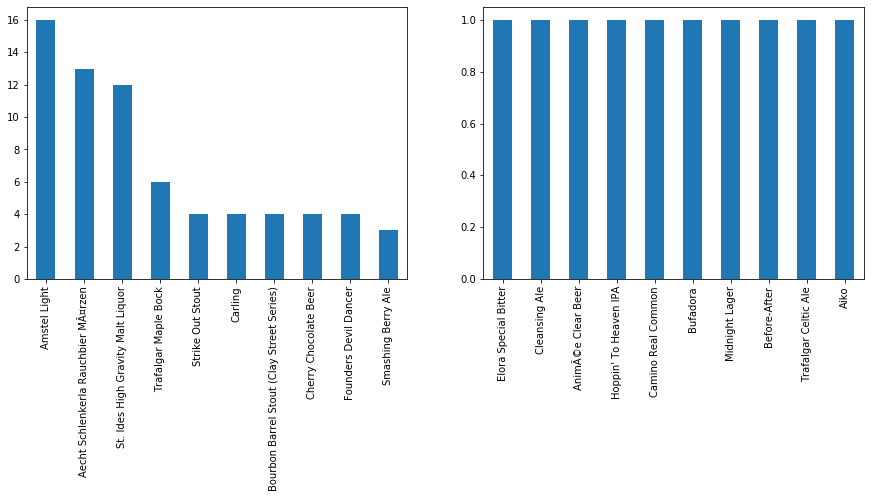

In [104]:
plt.figure(figsize= (15,5))
plt.xticks(fontsize = 8)
plt.yticks(fontsize=12)
plt.subplot(1,2,1)
rating_1['beer/name'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.subplot(1,2,2)
rating_1['beer/name'].value_counts().sort_values(ascending = True).head(10).plot(kind = 'bar')


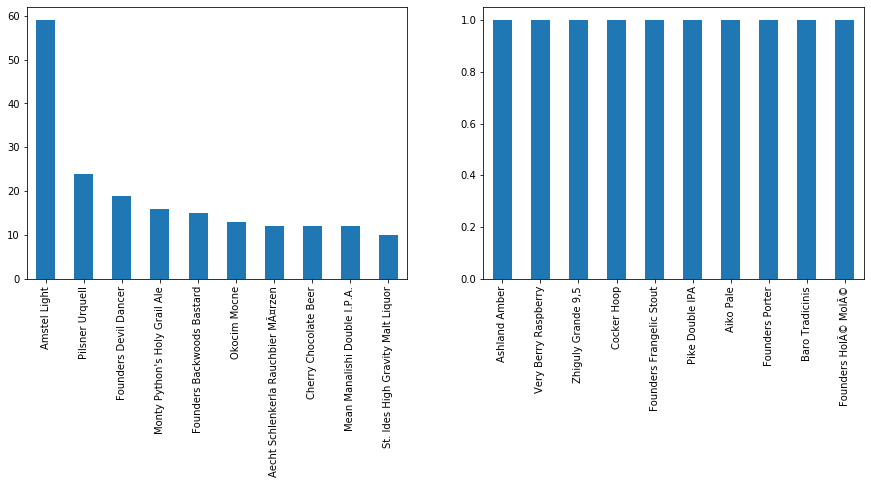

In [105]:
plt.figure(figsize= (15,5))
plt.xticks(fontsize = 8)
plt.yticks(fontsize=12)
plt.subplot(1,2,1)
rating_2['beer/name'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.subplot(1,2,2)
rating_2['beer/name'].value_counts().sort_values(ascending = True).head(10).plot(kind = 'bar')


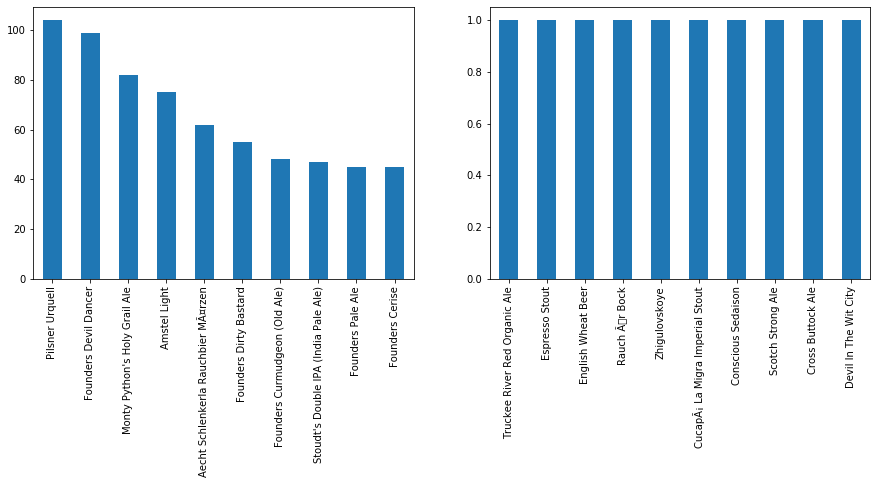

In [106]:
plt.figure(figsize= (15,5))
plt.xticks(fontsize = 8)
plt.yticks(fontsize=12)
plt.subplot(1,2,1)
rating_3['beer/name'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.subplot(1,2,2)
rating_3['beer/name'].value_counts().sort_values(ascending = True).head(10).plot(kind = 'bar')


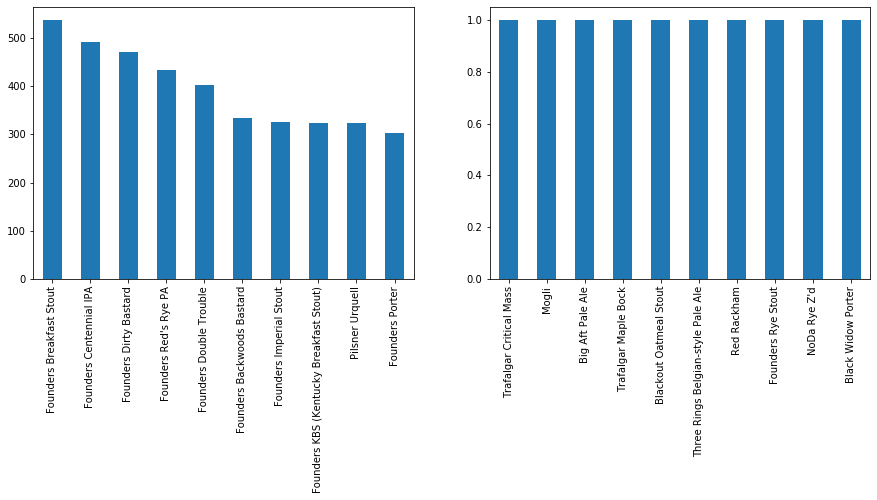

In [107]:
plt.figure(figsize= (15,5))
plt.xticks(fontsize = 8)
plt.yticks(fontsize=12)
plt.subplot(1,2,1)
rating_4['beer/name'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.subplot(1,2,2)
rating_4['beer/name'].value_counts().sort_values(ascending = True).head(10).plot(kind = 'bar')


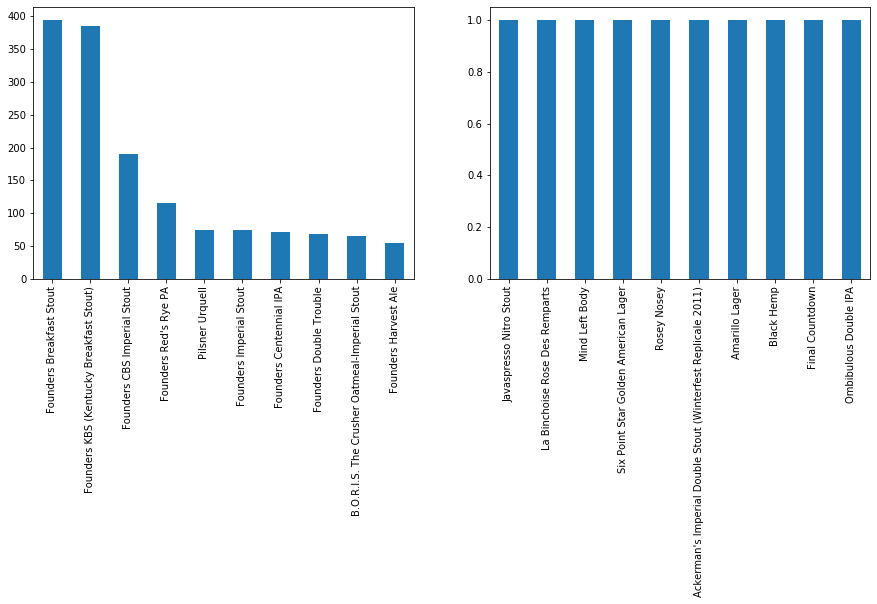

In [134]:
plt.figure(figsize= (15,5))
plt.xticks(fontsize = 8)
plt.yticks(fontsize=12)
plt.subplot(1,2,1)
rating_5['beer/name'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.subplot(1,2,2)
rating_5['beer/name'].value_counts().sort_values(ascending = True).head(10).plot(kind = 'bar')


#### Converting 10 classes into 5 classes

In [109]:
df['review/overall'].value_counts()

4.0    13868
4.5     8666
3.5     6551
3.0     3319
5.0     2671
2.5     1193
2.0      807
1.5      248
1.0      176
0.0        1
Name: review/overall, dtype: int64

In [110]:
df['review/overall'] = df['review/overall'].apply(np.ceil)

In [111]:
df = df[df['review/overall'] != 0.0 ]

In [112]:
df['review/overall'].value_counts()

4.0    20419
5.0    11337
3.0     4512
2.0     1055
1.0      176
Name: review/overall, dtype: int64

In [113]:
df.head(3)

,index,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review_year,review_month,review_day
0,40163,5.0,4.0,4.0,4.0,4.0,4.0,2008,12,351
1,8135,11.0,4.0,3.5,4.0,3.5,3.0,2008,8,221
2,10529,4.7,3.5,4.0,4.0,3.5,3.5,2004,11,331


In [114]:
df.isnull().sum()

index                0
beer/ABV             0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review_year          0
review_month         0
review_day           0
dtype: int64

### Model Building

##### Checking whether the classes are imbalanced

In [115]:
df['review/overall'].value_counts(normalize = True)

4.0    0.544521
5.0    0.302328
3.0    0.120323
2.0    0.028134
1.0    0.004693
Name: review/overall, dtype: float64

In [116]:
# As we can see that the classes are imbalanced, we'll first build models without balancing the classes and 
# then build models after changing the class weights.

In [117]:
X = df.drop('review/overall',1)
y = df['review/overall']

In [118]:
# Splitting to train test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [120]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

def mod_build(algo, X_train, X_test, y_train, y_test):

    algo.fit(X_train, y_train)

    y_pred = algo.predict(X_test)
    y_prob = algo.predict_proba(X_test)

    print('Classification Report')
    print(classification_report(y_test, y_pred))

    print(confusion_matrix(y_test, y_pred))

    print('Accuracy Score:', end = ' ')
    print(accuracy_score(y_test, y_pred))
    
    roc_score = multiclass_roc_auc_score(y_test, y_pred)
    print('roc auc Score:', end = ' ')
    print(roc_score)
#     roc_auc_curve(y_test, y_pred)

In [121]:
lr = LogisticRegression(multi_class = 'multinomial')
mod_build(lr, X_train, X_test, y_train, y_test)

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        47
         2.0       0.00      0.00      0.00       306
         3.0       0.00      0.00      0.00      1320
         4.0       0.55      1.00      0.71      6142
         5.0       0.00      0.00      0.00      3435

    accuracy                           0.55     11250
   macro avg       0.11      0.20      0.14     11250
weighted avg       0.30      0.55      0.39     11250

[[   0    0    0   47    0]
 [   0    0    0  306    0]
 [   0    0    0 1320    0]
 [   0    0    0 6142    0]
 [   0    0    0 3435    0]]
Accuracy Score: 0.5459555555555555
roc auc Score: 0.5


In [122]:
rf = RandomForestClassifier()
mod_build(rf, X_train, X_test, y_train, y_test)

Classification Report
              precision    recall  f1-score   support

         1.0       0.50      0.23      0.32        47
         2.0       0.57      0.52      0.54       306
         3.0       0.61      0.52      0.57      1320
         4.0       0.72      0.80      0.76      6142
         5.0       0.68      0.60      0.64      3435

    accuracy                           0.70     11250
   macro avg       0.62      0.54      0.57     11250
weighted avg       0.69      0.70      0.69     11250

[[  11   28    8    0    0]
 [  10  159  120   16    1]
 [   1   81  692  524   22]
 [   0   10  293 4883  956]
 [   0    0   14 1345 2076]]
Accuracy Score: 0.6952
roc auc Score: 0.7127314590736971


#### Calculating class weights

In [123]:
from sklearn.utils.class_weight import compute_class_weight
class_wts = compute_class_weight('balanced', np.unique(df['review/overall']), df['review/overall']) 
class_wts

array([42.6125    ,  7.10881517,  1.66218972,  0.36729517,  0.66153303])

In [124]:
cl_un = np.unique(df['review/overall'])
di = {i:j for j,i in zip(class_wts,cl_un)}

#### Logistic Regression with class weights

In [125]:
lr = LogisticRegression(multi_class = 'multinomial', class_weight = di)
mod_build(lr, X_train, X_test, y_train, y_test)

Classification Report
              precision    recall  f1-score   support

         1.0       0.00      0.28      0.01        47
         2.0       0.04      0.41      0.08       306
         3.0       0.04      0.01      0.02      1320
         4.0       0.55      0.08      0.14      6142
         5.0       0.31      0.24      0.27      3435

    accuracy                           0.13     11250
   macro avg       0.19      0.20      0.10     11250
weighted avg       0.40      0.13      0.17     11250

[[  13   22    0    0   12]
 [ 105  124    4   17   56]
 [ 526  416   18   87  273]
 [2377 1544  246  512 1463]
 [1415  664  228  310  818]]
Accuracy Score: 0.132
roc auc Score: 0.5020352458540829


#### Random forest with class weights

In [126]:
rf = RandomForestClassifier(class_weight=di)
mod_build(rf, X_train, X_test, y_train, y_test)

Classification Report
              precision    recall  f1-score   support

         1.0       0.57      0.28      0.37        47
         2.0       0.59      0.50      0.54       306
         3.0       0.62      0.52      0.56      1320
         4.0       0.71      0.81      0.76      6142
         5.0       0.68      0.59      0.63      3435

    accuracy                           0.69     11250
   macro avg       0.63      0.54      0.57     11250
weighted avg       0.69      0.69      0.69     11250

[[  13   26    7    1    0]
 [  10  153  124   18    1]
 [   0   73  682  547   18]
 [   0    9  274 4945  914]
 [   0    0   11 1414 2010]]
Accuracy Score: 0.6936
roc auc Score: 0.7123860251246125


In [127]:
# We can see that there is not much of a difference after using class weights. 
# We have to try other techniques to balance the classes.

#### Random Over sampling

In [129]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print(Counter(y))
# define oversampling strategy
strategy = {5:20419, 1:20419, 2:20419, 3:20419,4:20419}      # over sampling strategy
oversample = RandomOverSampler(sampling_strategy= strategy)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.3, random_state = 40)

print(X_train_over.shape, X_test_over.shape, y_train_over.shape, y_test_over.shape)

Counter({4.0: 20419, 5.0: 11337, 3.0: 4512, 2.0: 1055, 1.0: 176})
Counter({4.0: 20419, 3.0: 20419, 5.0: 20419, 2.0: 20419, 1.0: 20419})
(71466, 9) (30629, 9) (71466,) (30629,)


In [130]:
rf = RandomForestClassifier()
rf.fit(X_train_over, y_train_over)
print("Train Accuracy:",rf.score(X_train_over, y_train_over))
print("Test Accuracy:",rf.score(X_test_over, y_test_over))

Train Accuracy: 1.0
Test Accuracy: 0.9105749453132652


In [35]:
mod_build(rf,X_train_over, X_test_over, y_train_over, y_test_over)

Classification Report
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      6162
         2.0       0.99      1.00      1.00      6170
         3.0       0.91      0.98      0.95      6084
         4.0       0.84      0.70      0.76      6103
         5.0       0.81      0.87      0.84      6110

    accuracy                           0.91     30629
   macro avg       0.91      0.91      0.91     30629
weighted avg       0.91      0.91      0.91     30629

[[6162    0    0    0    0]
 [   0 6170    0    0    0]
 [   0   22 5989   72    1]
 [   0   16  541 4273 1273]
 [   0    0   22  767 5321]]
Accuracy Score: 0.9113911652355611
roc auc Score: 0.9444740789918509


#### SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() 
X_sm, y_sm = smote.fit_sample(X,y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 40)

print(X_train_sm.shape, X_test_sm.shape, y_train_sm.shape, y_test_sm.shape)

(71466, 9) (30629, 9) (71466,) (30629,)


In [37]:
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
print("Train Accuracy:",rf.score(X_train_sm, y_train_sm))
print("Test Accuracy:",rf.score(X_test_sm, y_test_sm))

Train Accuracy: 1.0
Test Accuracy: 0.8763263573737308


In [39]:
# We can see that Random over sampling performs better than SMOTE and the scores have been considerably increased.

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.08,
        n_estimators=10, random_state=0)
mod_build(ada_rf, X_train_over, X_test_over, y_train_over, y_test_over)

Classification Report
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      6162
         2.0       0.99      1.00      1.00      6170
         3.0       0.91      0.99      0.95      6084
         4.0       0.83      0.70      0.76      6103
         5.0       0.81      0.87      0.84      6110

    accuracy                           0.91     30629
   macro avg       0.91      0.91      0.91     30629
weighted avg       0.91      0.91      0.91     30629

[[6162    0    0    0    0]
 [   0 6170    0    0    0]
 [   0   20 5993   71    0]
 [   0   16  544 4298 1245]
 [   0    2   17  790 5301]]
Accuracy Score: 0.9116850044075876
roc auc Score: 0.9446588507714173


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=200,
                                      random_state=3)
mod_build(gbc, X_train_over, X_test_over, y_train_over, y_test_over)

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97      6162
         2.0       0.85      0.82      0.83      6170
         3.0       0.71      0.68      0.69      6084
         4.0       0.61      0.62      0.62      6103
         5.0       0.75      0.77      0.76      6110

    accuracy                           0.77     30629
   macro avg       0.77      0.77      0.77     30629
weighted avg       0.77      0.77      0.77     30629

[[6089   73    0    0    0]
 [ 288 5029  776   66   11]
 [  29  797 4122 1012  124]
 [   0   36  822 3772 1473]
 [   0    5   76 1308 4721]]
Accuracy Score: 0.774853896633909
roc auc Score: 0.8590195573305668


#### Sentiment Analysis

#### VADAR

In [43]:
import numpy as np
import pandas as pd

dff = pd.read_csv('train.csv')
dff.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [44]:
dff.drop(['index','beer/beerId','beer/brewerId','beer/name',
       'beer/style','review/timeStruct',
       'review/timeUnix','user/ageInSeconds','user/birthdayUnix','user/profileName',
         'user/birthdayRaw','user/gender'],1,inplace = True)

In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [48]:
dff.dropna(subset= ['review/text'],inplace = True)
dff = dff[dff['review/overall'] != 0.0] 

In [49]:
dff['scores'] = dff['review/text'].apply(lambda review: analyser.polarity_scores(review))
dff['compound']  = dff['scores'].apply(lambda score_dict: score_dict['compound'])
dff['comp_score'] = dff['compound'].apply(lambda c: 2 if c >0.05 else 1 if c < -0.05 else 0)

In [50]:
dff.comp_score.value_counts()

2    34850
1     2290
0      349
Name: comp_score, dtype: int64

##### Actual Sentiment

In [58]:
# actual values , extracted sentiment from overall ratings
dff['review/overall'] = dff['review/overall'].apply(lambda x :np.ceil(x))
dff['review/sentiment'] = dff['review/overall'].apply(lambda x: 2 if x > 3 else 1 if x < 3 else 0) # 2- pos , 1 -neg, 0-neu

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(dff['review/sentiment'],dff['comp_score']))
print(classification_report(dff['review/sentiment'],dff['comp_score']))
print(confusion_matrix(dff['review/sentiment'],dff['comp_score']))

0.826722505268212
              precision    recall  f1-score   support

           0       0.32      0.02      0.05      4512
           1       0.19      0.35      0.24      1231
           2       0.87      0.96      0.91     31746

    accuracy                           0.83     37489
   macro avg       0.46      0.44      0.40     37489
weighted avg       0.78      0.83      0.79     37489

[[  111   764  3637]
 [   40   430   761]
 [  198  1096 30452]]


#### Text blob 

In [59]:
from textblob import TextBlob

In [55]:
dff['polarity'] = dff['review/text'].apply(lambda comment: TextBlob(comment).sentiment.polarity)

In [56]:
dff['pol_score'] = dff['polarity'].apply(lambda c: 2 if c > 0.05 else 1 if c < -0.05 else 0 )

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(dff['review/sentiment'],dff['pol_score']))
print(classification_report(dff['review/sentiment'],dff['pol_score']))
print(confusion_matrix(dff['review/sentiment'],dff['pol_score']))

0.8050361439355544
              precision    recall  f1-score   support

           0       0.24      0.18      0.21      4512
           1       0.26      0.18      0.21      1231
           2       0.88      0.92      0.90     31746

    accuracy                           0.81     37489
   macro avg       0.46      0.43      0.44     37489
weighted avg       0.78      0.81      0.79     37489

[[  828   275  3409]
 [  352   216   663]
 [ 2279   331 29136]]


In [62]:
# We can see that VADAR is better at predicting negative reviews than TextBLob.
# Recall values of negative sentiment is less in TextBlob when compared to VADAR
# In a business predicting the negative reviews are more important than positive, so we choose VADAR

####  Are there any words that strongly predict the overall rating of the beer ?

In [63]:
text_en = ['Compatibility of systems of linear constraints over the set of'
    'natural numbers. Criteria of compatibility of a system of linear '
    'Diophantine equations, strict inequations, and nonstrict inequations '
    'are considered. Upper bounds for components of a minimal set of '
    'solutions and algorithms of construction of minimal generating sets '
    'of solutions for all types of systems are given. These criteria and '
    'the corresponding algorithms for constructing a minimal supporting '
    'set of solutions can be used in solving all the considered types of '
    'systems and systems of mixed types.']

In [65]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 


stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(text_en[0]) 

filtered_sentence = [w for w in word_tokens if not w in stop_words] 

filtered_sentence = [] 

for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

print(word_tokens) 
print(filtered_sentence) 


['Compatibility', 'of', 'systems', 'of', 'linear', 'constraints', 'over', 'the', 'set', 'ofnatural', 'numbers', '.', 'Criteria', 'of', 'compatibility', 'of', 'a', 'system', 'of', 'linear', 'Diophantine', 'equations', ',', 'strict', 'inequations', ',', 'and', 'nonstrict', 'inequations', 'are', 'considered', '.', 'Upper', 'bounds', 'for', 'components', 'of', 'a', 'minimal', 'set', 'of', 'solutions', 'and', 'algorithms', 'of', 'construction', 'of', 'minimal', 'generating', 'sets', 'of', 'solutions', 'for', 'all', 'types', 'of', 'systems', 'are', 'given', '.', 'These', 'criteria', 'and', 'the', 'corresponding', 'algorithms', 'for', 'constructing', 'a', 'minimal', 'supporting', 'set', 'of', 'solutions', 'can', 'be', 'used', 'in', 'solving', 'all', 'the', 'considered', 'types', 'of', 'systems', 'and', 'systems', 'of', 'mixed', 'types', '.']
['Compatibility', 'systems', 'linear', 'constraints', 'set', 'ofnatural', 'numbers', '.', 'Criteria', 'compatibility', 'system', 'linear', 'Diophantine',

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

filtered_sentence = [' '.join(filtered_sentence)]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_sentence)
print(vectorizer.get_feature_names())

['algorithms', 'bounds', 'compatibility', 'components', 'considered', 'constraints', 'constructing', 'construction', 'corresponding', 'criteria', 'diophantine', 'equations', 'generating', 'given', 'inequations', 'linear', 'minimal', 'mixed', 'nonstrict', 'numbers', 'ofnatural', 'set', 'sets', 'solutions', 'solving', 'strict', 'supporting', 'system', 'systems', 'these', 'types', 'upper', 'used']


In [69]:
df.columns

Index(['index', 'beer/ABV', 'review/appearance', 'review/aroma',
       'review/overall', 'review/palate', 'review/taste', 'review_year',
       'review_month', 'review_day', 'review/sentiment'],
      dtype='object')

In [71]:
review = dff[['review/text','review/overall', 'review/sentiment']]
review.head()

,review/text,review/overall,review/sentiment
0,Pours a clouded gold with a thin white head. N...,4.0,2
1,12oz bottle into 8oz snifter.\t\tDeep ruby red...,4.0,2
2,First enjoyed at the brewpub about 2 years ago...,4.0,2
3,First thing I noticed after pouring from green...,3.0,0
4,A: pours an amber with a one finger head but o...,3.0,0


##### Preprocessing

In [72]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
def preprocess(text):
    stemmer= PorterStemmer()
    stop_words = set(stopwords.words('english'))
    lemmatizer=WordNetLemmatizer()
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    
    text = text.lower() 
    text = re.sub(r'\d+', '', text)    
    text =  [text.replace(ele, "") for ele in text if ele in punc]
    text = ' '.join(text)
    text = text.strip()
    li = word_tokenize(text)
    li = [i for i in li if not i in stop_words]
    li  =  [stemmer.stem(word) for word in li]
    li = [lemmatizer.lemmatize(word) for word in li]
    return ' '.join(li)

In [73]:
review.columns

Index(['review/text', 'review/overall', 'review/sentiment'], dtype='object')

In [74]:
# review['text'] = review['review/text'].apply(lambda x: preprocess(x))

In [ ]:
# The top words that predicts the rating of the beer can be found by using TFIDF vectorizer after preprocessing the text data.